### ETL. 

In this process we will do some ETL to the data given by the client. We will treat the following:
- Nulls.
- Dimensionality.
- Normalization of the data. 
- (As there is vibration data we might use the FFT to see if there is any possibility to improve the data.)

In [63]:
%pip install seaborn

     -------------------------------------- 294.8/294.8 KB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\luisa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

#### Files to dataframe.

In [2]:
df_train = pd.read_csv("./Week 1/Dataset/Train.csv")
df_test = pd.read_csv("./Week 1/Dataset/Test.csv")

#### Percentage of nulls. 

We check again all the nulls in both files and 

In [3]:
# Calculate null percentage for each variable
null_percentage_per_variable = (df_train.isnull().sum() / len(df_train)) * 100

# Display null percentage for each variable
print("Null percentage for each variable in df_train:")
print(null_percentage_per_variable[null_percentage_per_variable != 0])

Null percentage for each variable:
V1    0.09
V2    0.09
dtype: float64


In [16]:
# Calculate null percentage for each variable
null_percentage_per_variable = (df_test.isnull().sum() / len(df_test)) * 100

# Display null percentage for each variable
print("Null percentage for each variable in df_train:")
print(null_percentage_per_variable[null_percentage_per_variable != 0])

Null percentage for each variable in df_train:
Series([], dtype: float64)


#### Boxplot 

We can observe that there is a big amount of outliers presented in the dataset.

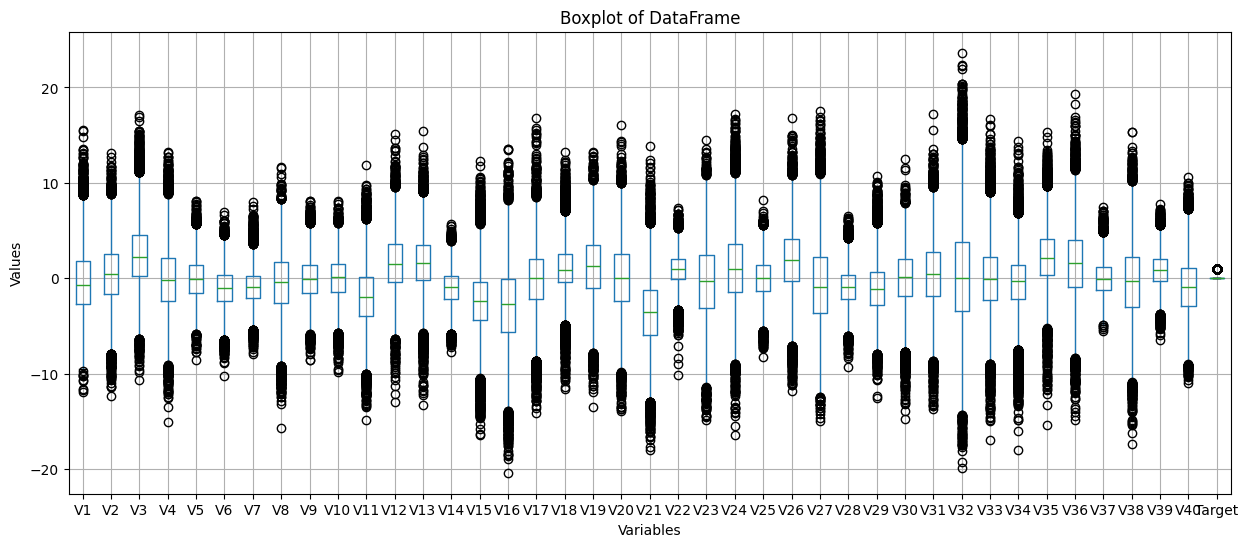

In [73]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
df_train.boxplot()

plt.title('Boxplot of DataFrame')  # Set a title for the boxplot
plt.xlabel('Variables')  # Label for x-axis if needed
plt.ylabel('Values')  # Label for y-axis if needed

plt.show()

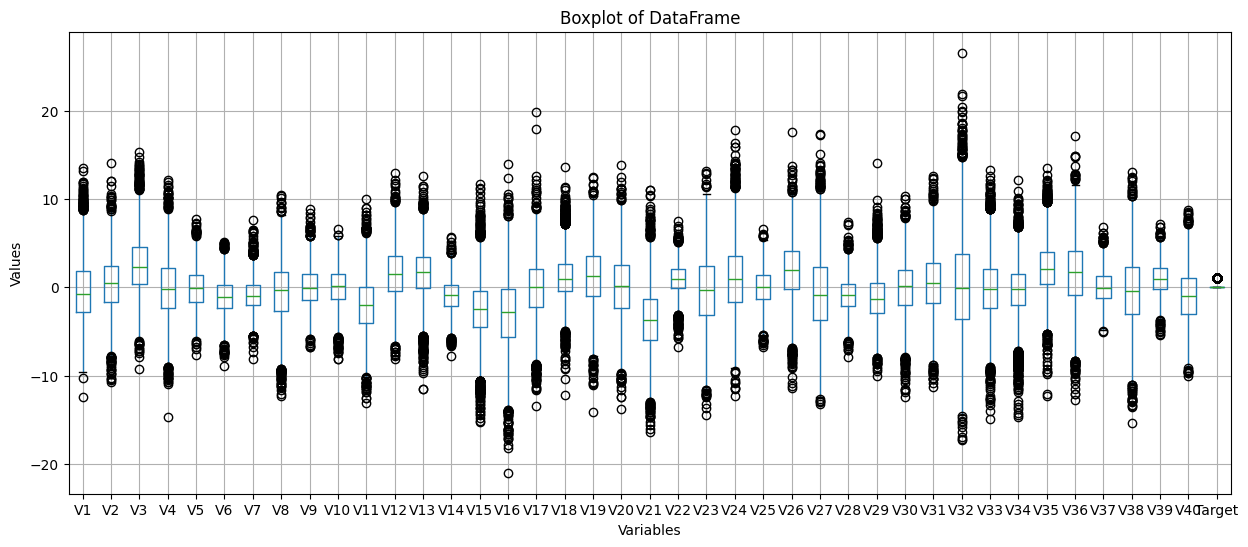

In [6]:
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
df_test.boxplot()

plt.title('Boxplot of DataFrame')  # Set a title for the boxplot
plt.xlabel('Variables')  # Label for x-axis if needed
plt.ylabel('Values')  # Label for y-axis if needed

plt.show()

#### Fill nan values. 

In [7]:
df_train[['V1', 'V2']].describe()

,V1,V2
count,19982.000000,19982.000000
mean,-0.271996,0.440430
std,3.441625,3.150784
min,-11.876451,-12.319951
25%,-2.737146,-1.640674
50%,-0.747917,0.471536
75%,1.840112,2.543967
max,15.493002,13.089269


<Axes: >

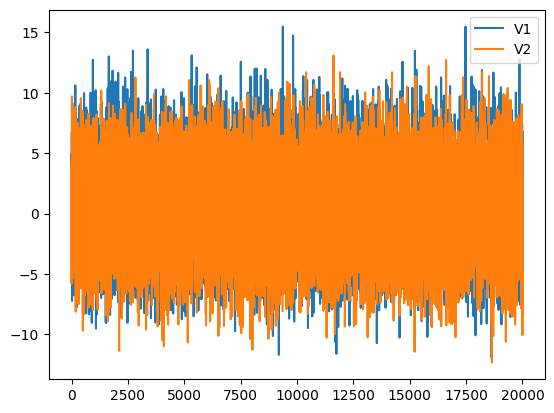

In [9]:
df_train[['V1', 'V2']].plot()

Let´s be conservative and fill the nulls with the mean in each case. 

In [12]:
def df_fill(df, columns):
    # Fill NaN values in specific columns
    df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

In [13]:
columns_to_fill = ['V1', 'V2']
df_fill(df_train, columns_to_fill)
df_fill(df_test, columns_to_fill)

Looks like that we cleared the nulls. 

In [15]:
# Calculate null percentage for each variable
null_percentage_per_variable = (df_train.isnull().sum() / len(df_train)) * 100

# Display null percentage for each variable
print("Null percentage for each variable in df_train:")
print(null_percentage_per_variable[null_percentage_per_variable != 0])

Null percentage for each variable in df_train:
Series([], dtype: float64)


#### PCA

There are too many variables so there is a excess of dimensionality, maybe we will need to include PCA or a similar technique. 

In [24]:
y_train = df_train[['Target']]
y_test =  df_test[['Target']]

X_train = df_train.drop('Target', axis=1)  # Remove the target column to keep only features
X_test = df_test.drop('Target', axis=1)  # Remove the target column to keep only features

In [38]:
def df_pca(df):
    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(df)

    # Apply PCA
    pca = PCA(n_components=15)  # Set the number of components you want to keep
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Transform the PCA components back to a DataFrame (if needed)
    X_train_pca = pd.DataFrame(data=X_train_pca, columns=[f"V{i+1}" for i in range(X_train_pca.shape[1])])

    return X_train_pca

In [39]:
X_train_pca = df_pca(X_train)
X_test_pca = df_pca(X_test)

#### Feature Enginering

We will need to have a good understading of the data, for thhis reson we believe that this section can be skipped. 

#### Outliers.

We will treat the outliersin the following iterations, in order to measure the impact in the accuracy. 

### Save h5. 

In [56]:
# Creating an HDF5 file
with pd.HDFStore('data_etl.h5') as store:
    # Creating folders and saving DataFrames within them
    store.put('/X_train', X_train)
    store.put('/X_test', X_test)
    store.put('/X_train_pca', X_train_pca)
    store.put('/X_test_pca', X_test_pca)
    store.put('/y_train', y_train)
    store.put('/y_test', y_test)


In [57]:
# Open the HDF5 file
with pd.HDFStore('data_etl.h5', mode='r') as store:
    # Get the keys (structure) within the HDF5 file
    keys = store.keys()
    # Access and retrieve specific DataFrames
    #X_train = store.get('/train/X')
    #X_test = store.get('/test/X')
    #y_train = store.get('/train/y')
    #y_test = store.get('/test/y')

# Display the keys
print("Keys in the HDF5 file:")
for key in keys:
    print(key)

Keys in the HDF5 file:
/X_test
/X_test_pca
/X_train
/X_train_pca
/y_test
/y_train
